# Домашнее задание №2 - часть 2

## Задание 1

In [1]:
pip install pymorphy2

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()

In [6]:
with open('6.txt', 'r', encoding='utf-8') as f:
    text = f.read()

Мне показалось, что брать json из прошлой домашки будет не очень, потому что там словарь формата лемма - pos, а создавать другой просто чтобы загрузить его сюда несколько непрактично - поэтому просто вычитала и проанализировала файл. Мучаем все ту же "Палату" Чехова.

In [7]:
import nltk
from nltk.tokenize import word_tokenize

words = [w.lower() for w in word_tokenize(text) if w.isalpha()]

for word in words:
    morph.parse(word)

ready = []
for word in words:
    ready.append(morph.parse(word)[0])

In [62]:
normal = []
gen = []
part = []
cases = []
numb = []
anim = []
asp = []
inv = []
md = []
pers = []
ten = []
trans = []
voices = []
full = []

for word in ready:
    if word.tag.POS != None:
        full.append(word.word)
        part.append(word.tag.POS)
        normal.append(word.normal_form)
        cases.append(word.tag.case)
        numb.append(word.tag.number)
        gen.append(word.tag.gender)
        anim.append(word.tag.animacy)
        asp.append(word.tag.aspect)
        inv.append(word.tag.involvement)
        md.append(word.tag.mood)
        pers.append(word.tag.person)
        ten.append(word.tag.tense)
        trans.append(word.tag.transitivity)
        voices.append(word.tag.voice)

In [63]:
dictionary = {'word': full, 'lex': normal}
df = pd.DataFrame(dictionary)

In [112]:
df['part of speech'] = part
df['case'] = cases
df['number'] = numb
df['gender'] = gen
df['animacy'] = anim
df['aspect'] = asp
df['involvement'] = inv
df['mood'] = md
df['person'] = pers
df['tense'] = ten
df['transitivity'] = trans
df['voice'] = voices

In [113]:
df.head(30)

,word,lex,part of speech,case,number,gender,animacy,aspect,involvement,mood,person,tense,transitivity,voice
0,павлович,павло,NOUN,nomn,sing,masc,anim,None,None,None,None,None,None,None
1,чехов,чех,NOUN,gent,plur,masc,anim,None,None,None,None,None,None,None
2,палата,палата,NOUN,nomn,sing,femn,inan,None,None,None,None,None,None,None
3,издательство,издательство,NOUN,nomn,sing,neut,inan,None,None,None,None,None,None,None
4,художественная,художественный,ADJF,nomn,sing,femn,None,None,None,None,None,None,None,None
5,литература,литература,NOUN,nomn,sing,femn,inan,None,None,None,None,None,None,None
6,бычков,бычков,NOUN,nomn,sing,masc,anim,None,None,None,None,None,None,None
7,в,в,PREP,None,None,None,None,None,None,None,None,None,None,None
8,больничном,больничный,ADJF,loct,sing,masc,None,None,None,None,None,None,None,None
9,дворе,двор,NOUN,loct,sing,masc,inan,None,None,None,None,None,None,None


я посчитала нужным убрать слова типа "no", для которых в базе нет маркера части речи

## Задание 2
Ура, графики из конспектов! Распарсим же текст Антона Павловича на красивые картинки.

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

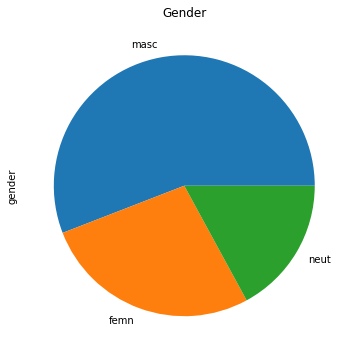

In [70]:
plt.figure(figsize=(6, 6))
df['gender'].value_counts().plot(kind='pie');
plt.title('Gender');

In [73]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [76]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

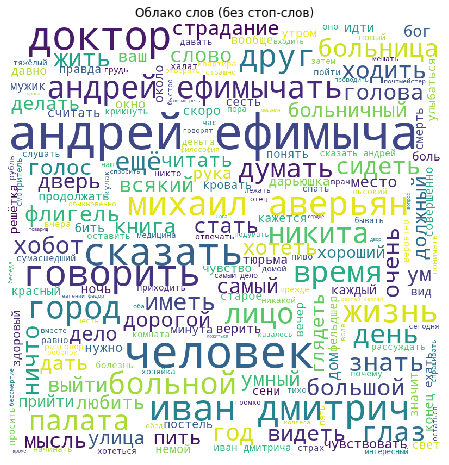

In [77]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

stops = set(stopwords.words('russian') + ['это', 'весь', 'который', 'мочь', 'свой'])
text = ' '.join([word for word in df['lex'].values if word not in stops])

wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако слов (без стоп-слов)')
plt.show()

In [102]:
df2 = df[['lex', 'part of speech', 'gender']].groupby(['lex', 'part of speech'], as_index=False).count()
df2.columns = ['lex', 'part of speech', 'total']
df2 = df2[df2['total'] > 10]

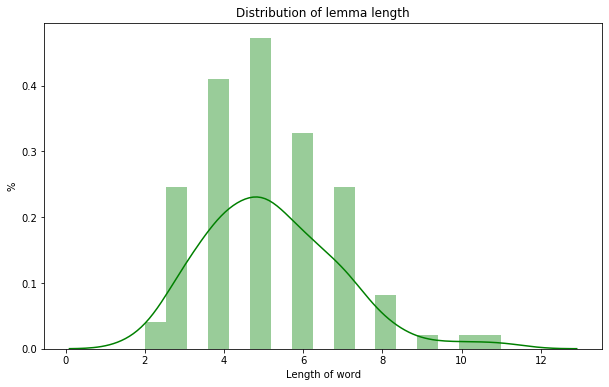

In [103]:
df2['length'] = df2['lex'].apply(len)
plt.figure(figsize=(10, 6))
sns.distplot(df2['length'], bins=17, color='green')
plt.title('Distribution of lemma length')
plt.ylabel('%')
plt.xlabel('Length of word');

Прошу заранее прощения за несколько простецкие графики - у меня возникли проблемы со сложными столбчатыми графиками, которую я не успела решить вовремя. Но надеюсь, что к тому времени как эту домашку проверят, я успею разобраться в чем дело!

## Задание 3

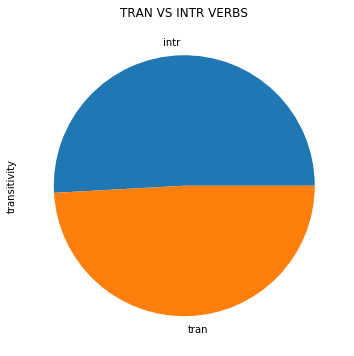

In [114]:
plt.figure(figsize=(6, 6))
df['transitivity'].value_counts().plot(kind='pie');
plt.title('TRAN VS INTR VERBS');

Недавно на майноре мы объясняли нелингвистам эргативность, так что я решила посмотреть отношение переходных - непереходных глаголов в тексте - это удобнее всего посмотреть через pie chart, т.к. тут всего две величины. (результат прикольный кстати, не ожидала)

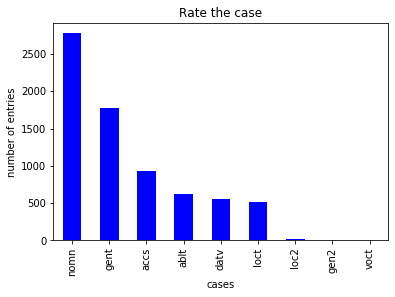

In [117]:
df['case'].value_counts().plot.bar(color='blue');
plt.title('Rate the case')
plt.xlabel('cases')
plt.ylabel('number of entries');

Пока я копалась в документации, в голову пришла мысль посмотреть какие падежи используются чаще других, поэтому столбчатая диаграмма где на Х - падежи, а на У - кол-во вхождений. Рейтинг такой получился.

## Задание 4

In [78]:
from nltk.draw.dispersion import dispersion_plot

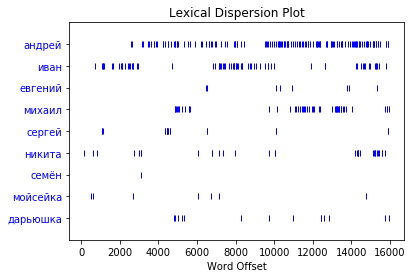

In [80]:
names = ["андрей", "иван", "евгений", "михаил", 'сергей','никита',"семён","мойсейка","дарьюшка" ]
dispersion_plot(normal, names)

Это имена всех героев повести в том порядке, в котором их написали на страничке в википедии.